In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
train_df = pd.read_csv(r'D:\DS PRO\PROJECTS\Disease Diagnosis\Training.csv')
test_df = pd.read_csv(r'D:\DS PRO\PROJECTS\Disease Diagnosis\Testing.csv')

In [4]:
print(f'Train Set Dimension : {train_df.shape}\nTest Set Dimension : {test_df.shape}')

Train Set Dimension : (4920, 134)
Test Set Dimension : (42, 133)


In [5]:
train_df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [6]:
test_df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [7]:
train_df.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [8]:
test_df.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD


In [9]:
#data preprocessing

# deleting unwanted columns
train_df.drop(columns = ['Unnamed: 133'], inplace = True)

y_test = test_df[['prognosis']]

test_df.drop(columns = ['prognosis'], inplace = True)

In [10]:
train_df.shape, test_df.shape

((4920, 133), (42, 132))

In [11]:
train_df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [12]:
# training set

null_columns = []

for col in train_df.columns:
    null_count = train_df[col].isna().sum()
    if null_count > 0:
        print(f"Column '{col}' has {null_count} null values")
        null_columns.append(col)

if not null_columns:
    print('No null values in any column')

No null values in any column


In [13]:
# testing set

null_columns = []

for col in test_df.columns:
    null_count = test_df[col].isna().sum()
    if null_count > 0:
        print(f"Column '{col}' has {null_count} null values")
        null_columns.append(col)

if not null_columns:
    print('No null values in any column')

No null values in any column


In [14]:
#Specifying Train & Test Sets

X_train = train_df.drop(columns = ['prognosis'])
y_train = train_df[['prognosis']]
X_test = test_df

In [ ]:
classifier = GridSearchCV(RandomForestClassifier(n_jobs = 1, random_state = 42),{
    'n_estimators' : [100, 150, 200],
    'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth' : [7, 15, 20],
    'min_samples_split' : [2, 3, 4],
    'max_features' : [50, 100, 133],
    'bootstrap' : [True, False]
})

classifier.fit(X_train, y_train)

In [16]:
classifier = GridSearchCV(
    estimator=RandomForestClassifier(n_jobs=-1, random_state=42),  # Train each forest in parallel
    param_grid={
        'n_estimators': [100, 150, 200],
        'criterion': ["gini", "entropy", "log_loss"],
        'max_depth': [7, 15, 20],
        'min_samples_split': [2, 3, 4],
        'max_features': [50, 100, 133],
        'bootstrap': [True, False]
    },
    n_jobs=-1,  # Run GridSearchCV parameter combinations in parallel
    verbose=2  # Optional: to track progress
)

classifier.fit(X_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 15, 20],
                         'max_features': [50, 100, 133],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

In [17]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

In [18]:
clf_df = pd.DataFrame(classifier.cv_results_)

In [19]:
clf_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_bootstrap', 'param_criterion', 'param_max_depth',
       'param_max_features', 'param_min_samples_split', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [20]:
clf_df[['param_bootstrap', 'param_criterion', 'param_max_depth', 'param_max_features',
        'param_min_samples_split', 'param_n_estimators', 'mean_test_score']].sort_values(by = 'mean_test_score',ascending = False).head(3)

,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,mean_test_score
135,True,entropy,20,50,2,100,1.0
471,False,log_loss,20,100,3,100,1.0
469,False,log_loss,20,100,2,150,1.0


In [21]:
#Building the model

best_params = classifier.best_params_

In [22]:
best_params

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 50,
 'min_samples_split': 2,
 'n_estimators': 100}

In [23]:
model = RandomForestClassifier(n_jobs = 1,
                               random_state = 42,
                               **best_params)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=50, n_jobs=1, random_state=42)

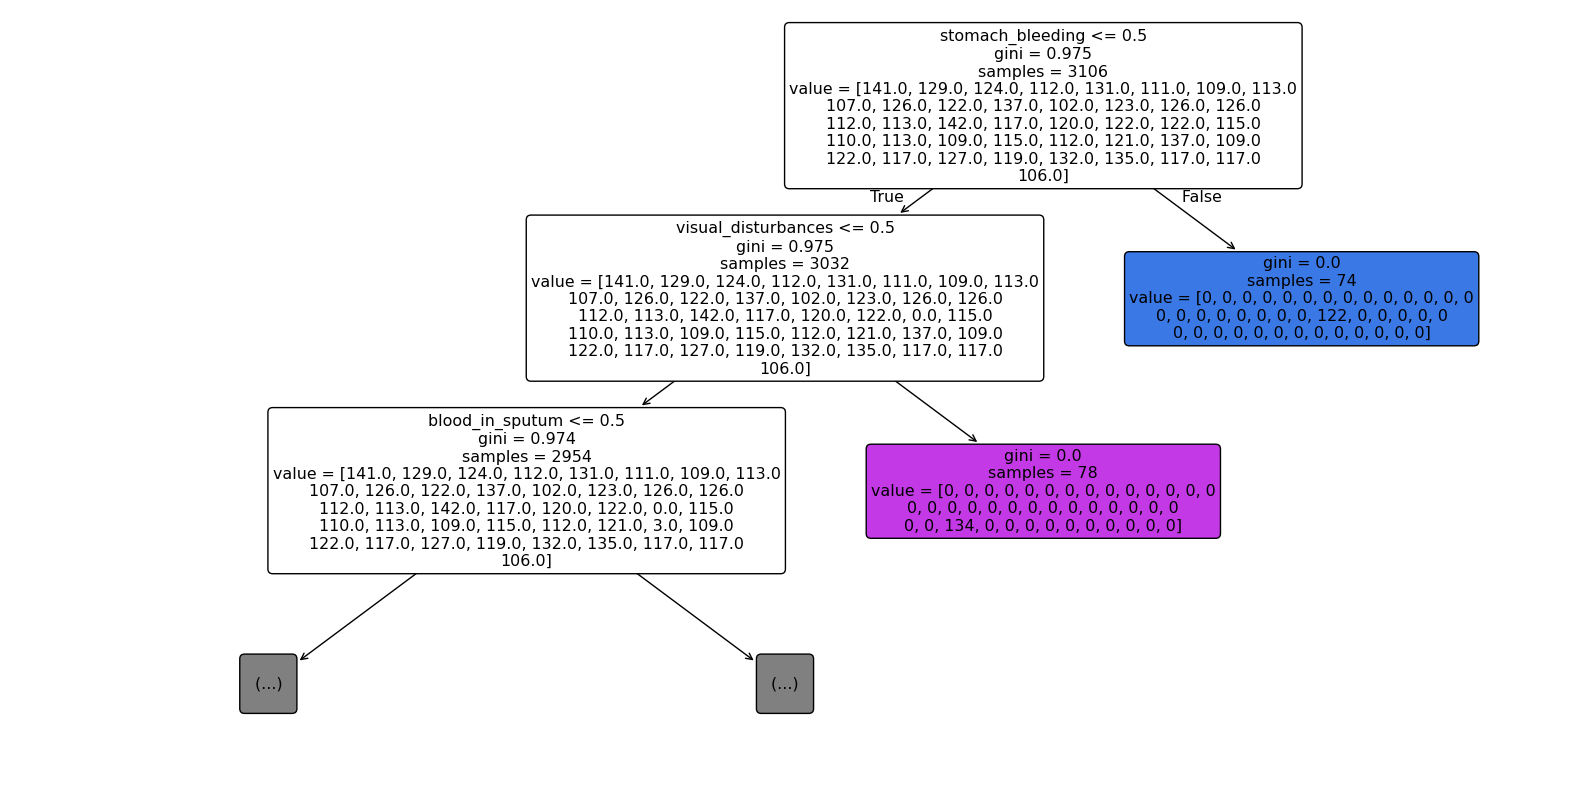

In [24]:
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0],
          max_depth=2,
          feature_names=X_train.columns,
          filled=True,
          rounded=True);

In [25]:
print(f'Model Accuracy : {model.score(X_test, y_test) * 100}')

Model Accuracy : 97.61904761904762


In [26]:
#Predictions and Evaluation
pred = model.predict(X_test)

In [27]:
print(classification_report(y_test, pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

In [28]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

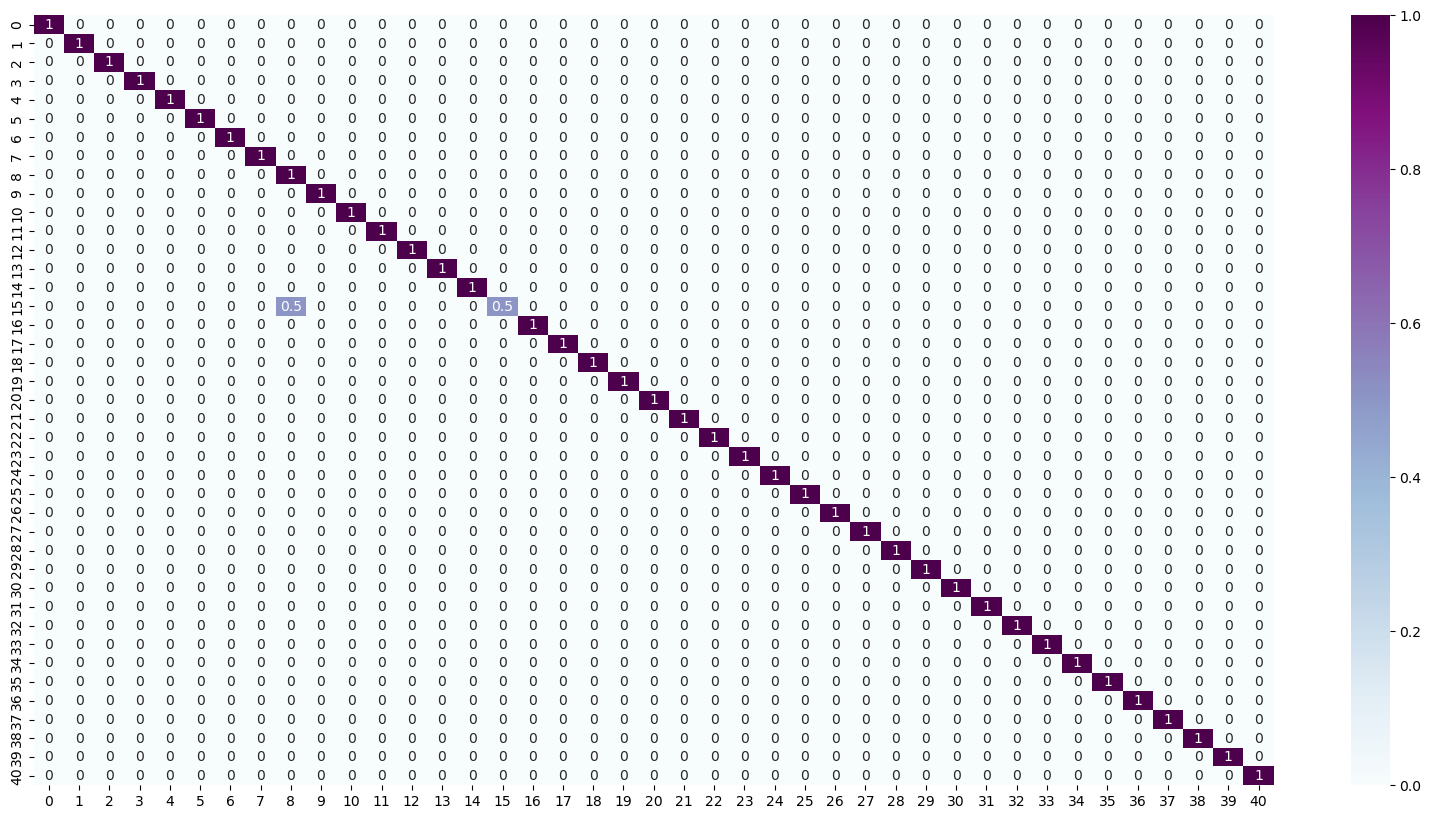

In [29]:
plt.figure(figsize=(20, 10))
cf = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'BuPu');

In [30]:
#Function to make manual predictions


def make_predictions(model, feature_names):
  take_input = {}
  for f in feature_names:
    value = input(f'{f}[0 : No/ 1 : Yes] : ')
    take_input[f] = int(value)
  input_df = pd.DataFrame([take_input])
  prediction = model.predict(input_df)
  return prediction

In [32]:
feature_names = X_train.columns

prediction = make_predictions(model, feature_names)

print("Predicted prognosis:", prediction[0])

Predicted prognosis: Hepatitis B
